In [1]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

# To scale the data  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#importing statiticals funtions
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf

# To tune model, get different metric scores, and split data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#missing values
from sklearn.impute import KNNImputer

#importing global
import glob
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')



In [2]:
#import scienceplots

In [4]:
data = pd.read_csv('/Users/gloriacarrascal/trabajo-grado/data/irradiancia_caribeStationsFrom2012.csv', parse_dates=['FECHA/HORA'])

In [3]:
data.head()

,ESTACION,FECHA/HORA,irradiancia,Region,DEPARTAMENTO
0,29065120.0,2013-09-08 01:00:00,1.500015,Caribe,Magdalena
1,29065120.0,2013-09-08 02:00:00,0.000000,Caribe,Magdalena
2,29065120.0,2013-09-08 03:00:00,0.000000,Caribe,Magdalena
3,29065120.0,2013-09-08 04:00:00,0.000000,Caribe,Magdalena
4,29065120.0,2013-09-08 05:00:00,0.000000,Caribe,Magdalena


In [ ]:
_data_allhistorical = pd.read_csv('/Users/gloriacarrascal/trabajo-grado/data/irradiancia_all_region_Matched.csv', parse_dates=['FECHA/HORA'])

In [7]:
#_data_allhistorical['FECHA/HORA'].min()

In [6]:
filtered_caribe_historical = _data_allhistorical[_data_allhistorical['Region']=='Caribe'].reset_index()
filtered_caribe_historical = filtered_caribe_historical.drop(['index'], axis=1)

In [5]:
del data['ESTACION']
del data['Region']
del data['DEPARTAMENTO']
data.head()


,FECHA/HORA,irradiancia
0,2013-09-08 01:00:00,1.500015
1,2013-09-08 02:00:00,0.000000
2,2013-09-08 03:00:00,0.000000
3,2013-09-08 04:00:00,0.000000
4,2013-09-08 05:00:00,0.000000


In [13]:
filtered_caribe_historical = filtered_caribe_historical.rename(columns={'DATO': 'irradiancia'})

## Starting the match of Station-Departamento-Region

Done!

### Exploratory data Analysis 10 years Irradiancia

In [24]:
filtered_caribe_historical.isnull().sum()

ESTACION       0
FECHA/HORA     0
irradiancia    0
year           0
Region         0
dtype: int64

In [25]:
filtered_caribe_historical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553845 entries, 0 to 747411
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ESTACION     553845 non-null  float64       
 1   FECHA/HORA   553845 non-null  datetime64[ns]
 2   irradiancia  553845 non-null  float64       
 3   year         553845 non-null  int64         
 4   Region       553845 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.4+ MB


In [39]:
data.max()

FECHA/HORA     2022-10-31 23:00:00
irradiancia            1099.464244
dtype: object

In [5]:
# Defining the hist_box() function
def hist_box(data,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
    # Adding a graph in each part
    sns.boxplot(data[col], ax=ax_box, showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    plt.xlabel('Irradiancia solar (kWm$^-2$)')
    plt.show()

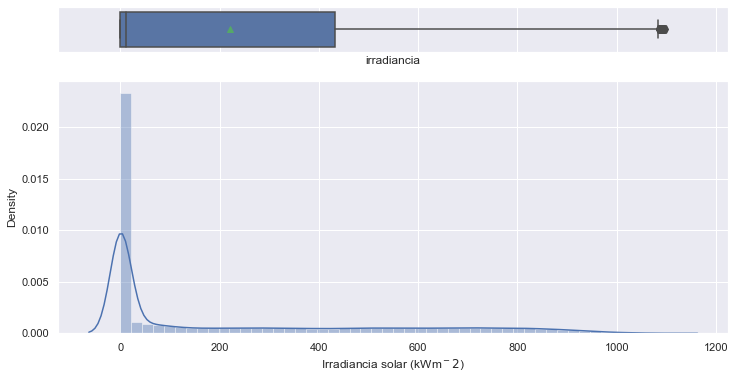

In [6]:
hist_box(data, 'irradiancia')    

- Datos distribuidos hacia la derecha. Se tienen outliera sobre los 1000 kWm$^-2$
- La irrandiancia tiene una media de 200 kWm$^-2$ en este intervalo de tiempo

- El departamento con el mayor número de observaciones es la Guajira

## Time serie analysis Region Caribe


In [6]:
data = data.set_index("FECHA/HORA").resample(rule="D").mean()

In [7]:
#-*- coding: utf-8 -*-


In [22]:
#plt.style.use(['science','no-latex'])
def temporal_serie(data, variable, location,  unit):
    fig, ax = plt.subplots(figsize=(18,6))

    ax.plot(data[variable], color='brown')

    min_timestamp = data.index.min()
    new_timestamp = min_timestamp - pd.DateOffset(days=30)
    max_timestamp = data.index.max()
    new_timestamp_max = max_timestamp + pd.DateOffset(days=30)

    plt.xlim([new_timestamp, new_timestamp_max])
    plt.xlabel('Año', fontsize=15)    
    plt.ylabel(f'Total Irradiancia ({unit})', fontsize=15)
    plt.savefig(f'/Users/gloriacarrascal/trabajo-grado/graficas/{variable}.png')

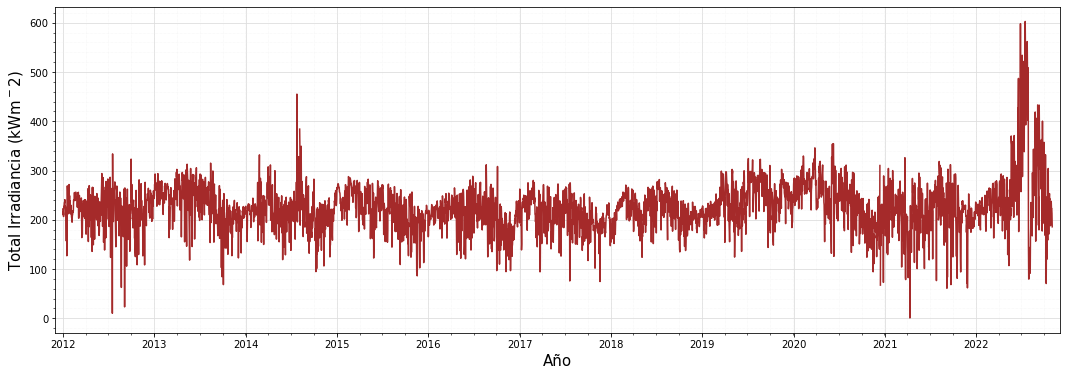

In [11]:
#serie temporal por mes
temporal_serie(data,'irradiancia','Region Caribe','kWm$^-2$')


- No es de mucha utilidad por día

In [12]:
# funcion estacionalidad
def seasonality(data, var, location, unit, time):
    plt.figure(figsize=(15,10))
    sns.boxplot(data=data, x=data.index.year, y=var)
    plt.title(f'Resumen de la Radiación solar en {location} en el periodo {time}')
    plt.xlabel('Año')
    plt.ylabel(f'{var} solar {unit}')
    plt.grid()
   # plt.savefig('/Users/gloriacarrascal/trabajo-grado/radiación global automáticas/graficas/caribe3.png')
    plt.show()

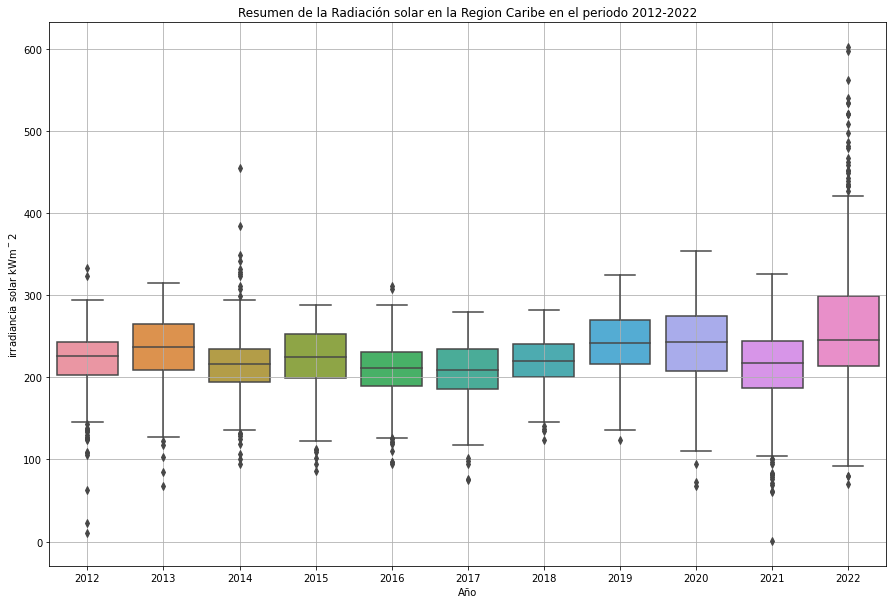

In [14]:
seasonality(data, 'irradiancia', 'la Region Caribe', 'kWm$^-2$', '2012-2022')

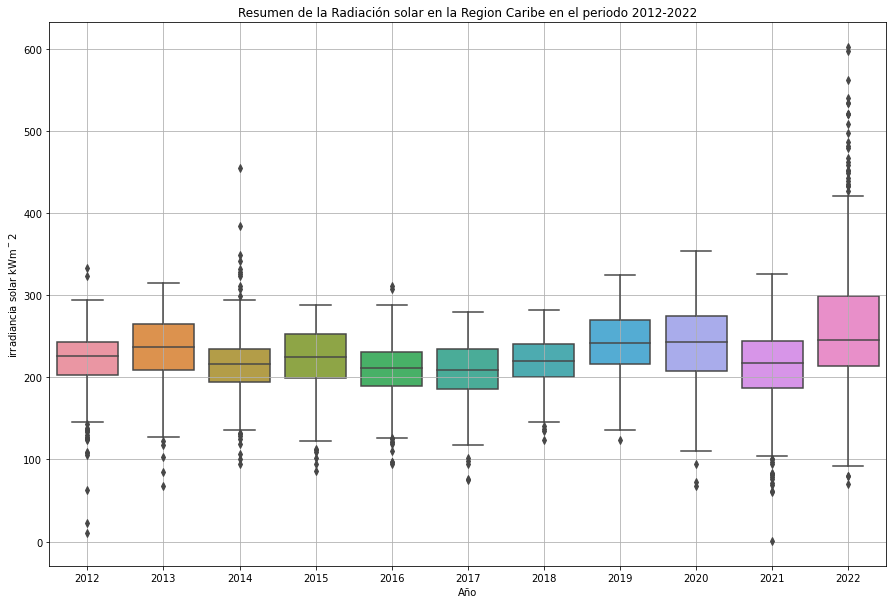

In [13]:
seasonality(data, 'irradiancia', 'la Region Caribe', 'kWm$^-2$', '2012-2022')

In [15]:
import plotly.graph_objs as go


In [16]:
#FUNCTION TO REMOVE OULIERS
def removed_outliers(data, col):
    #checking outliers
    _Processed = data[col]
    removed_outliers = _Processed.between(_Processed.quantile(.05), _Processed.quantile(.95))
#    print(str(_Processed[removed_outliers].size) + "/" + str(_Processed.size) + " data points remain.") 
    _Processed[removed_outliers].plot().get_figure()
    #print('the removed outliers are: ', removed_outliers_day.value_counts())
    index_names = data[~removed_outliers].index # INVERT removed_outliers!!
#   print('these are the index to drop: ', index_names_day) # The resulting 20 dates to drop.
    data.drop(index_names, inplace=True)
    return data

In [17]:
#outliersmonth+
_day = data.copy()

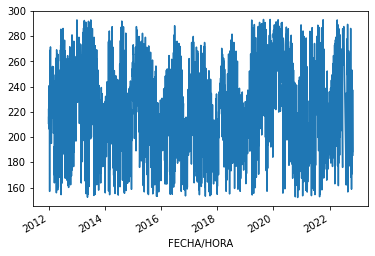

In [18]:
_solar_irradiation_day= removed_outliers(_day, 'irradiancia')

In [19]:
_solar_irradiation_day.isnull().sum()

irradiancia    0
dtype: int64

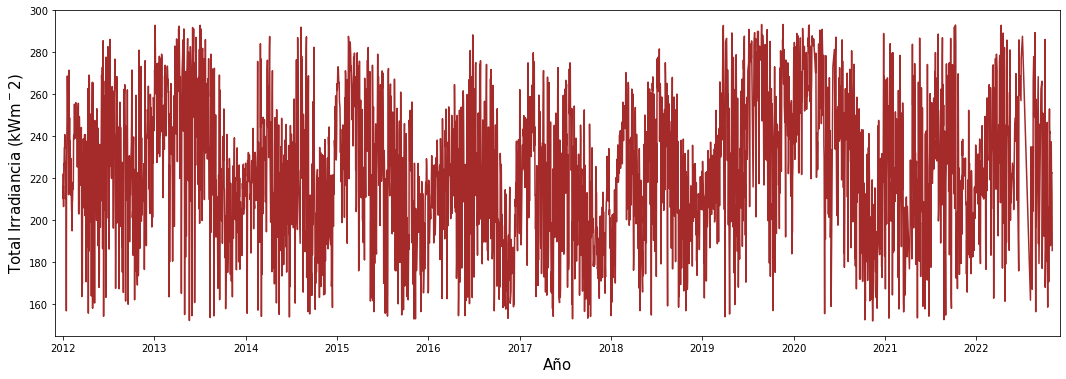

In [23]:
#serie temporal por mes
temporal_serie(_solar_irradiation_day,'irradiancia','Region Caribe','kWm$^-2$')

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
irradiancia,526166.0,184.170963,259.683289,0.0,0.0,2.95858,351.939451,833.915677


Dado que todos los valores son positivos, podemos mostrar esto a ambos lados del eje Y para enfatizar el crecimiento.

In [24]:
def handle_missing_values(data, col):
    #dato
    _knn = _solar_irradiation_day.copy(deep=True)

    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
    _knn[[col]] = knn_imputer.fit_transform(_knn[[col]])
    _knn[[col]].isnull().sum()
    return _knn

In [25]:
cleanned_data_all = handle_missing_values(_solar_irradiation_day, 'irradiancia')

In [26]:
cleanned_data_day = handle_missing_values(_solar_irradiation_day, 'irradiancia')

In [27]:
def two_side_view(dato, col):
    x = dato.index
    y1 = dato[col].values

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='yellow')
    plt.ylim(-800, 800)
    plt.title(f'Irradiancia solar en la región caribe colombiana (dos vistas), {dato.index.min().year} - {dato.index.max().year}', fontsize=14)
    plt.hlines(y=0, xmin=np.min(dato.index), xmax=np.max(dato.index), linewidth=.5)
    plt.xlabel('tiempo (día)')
    plt.ylabel(f'irradiancia (kWm$^-2$)')
    plt.show()

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def multiplicative_seasonal_decompose(data, col, type_model):
    '''type_mode: multiplicative, additive'''
    _decomposition = seasonal_decompose(data[col], model=type_model, period=30)
    return _decomposition

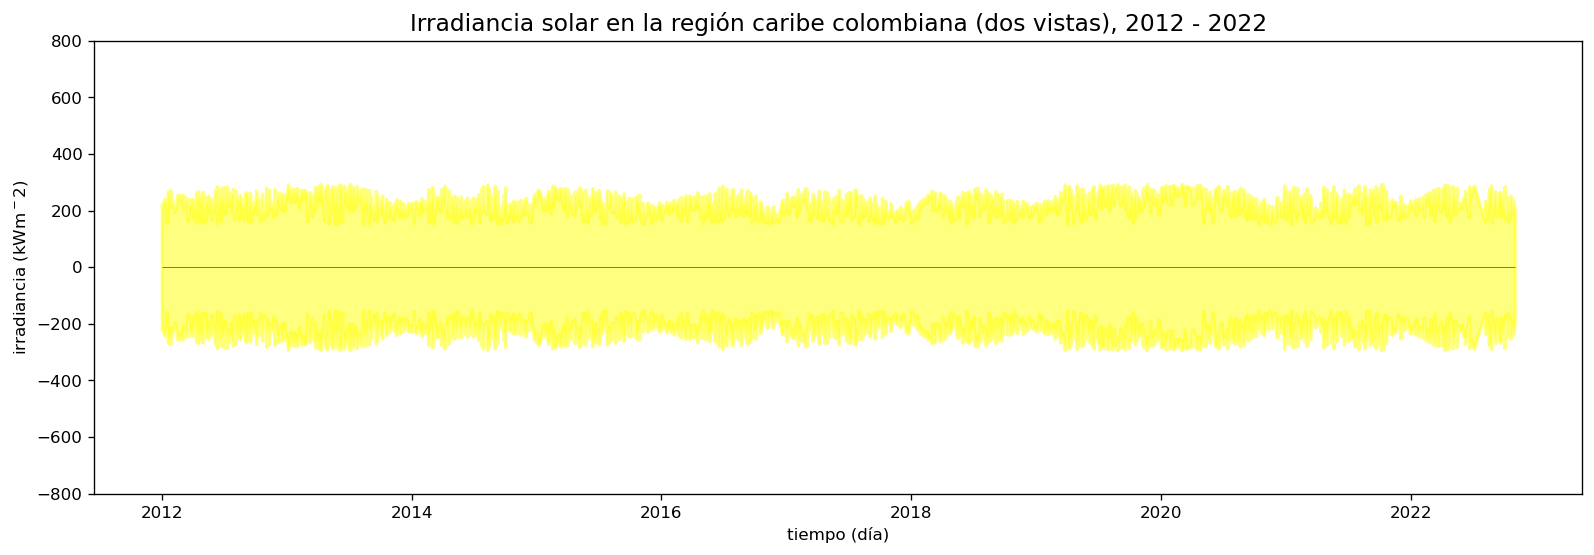

In [44]:
two_side_view(_solar_irradiation_day, 'irradiancia')

In [58]:
def trend(dataset):
    plt.subplots(figsize=(8,4))
    dataset.trend.plot(color='brown')

    plt.xlabel('Año', fontsize=15)    
    plt.ylabel('Total Irradiancia (kWm$^-2$)', fontsize=15)
    plt.show()
    plt.savefig(f'/Users/gloriacarrascal/trabajo-grado/graficas/trend.png')

In [62]:
def seasonality_decomposition(dataset):
    plt.subplots(figsize=(8,4))
    dataset.seasonal.plot(color='brown')

    plt.xlabel('Año', fontsize=15)    
    plt.ylabel('Variación Estacional', fontsize=15)
    plt.show()
    plt.savefig(f'/Users/gloriacarrascal/trabajo-grado/graficas/seasonal.png')

In [47]:
data_multiplicative = multiplicative_seasonal_decompose(_solar_irradiation_day.resample(rule="M").mean(), 'irradiancia','multiplicative')

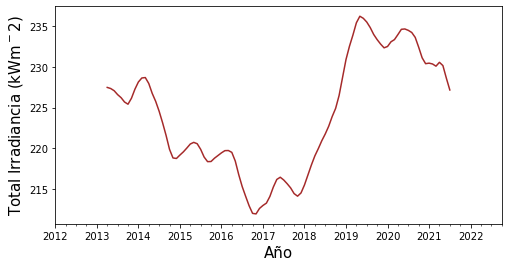

<Figure size 1152x1152 with 0 Axes>

In [59]:
trend(dataset=data_multiplicative)

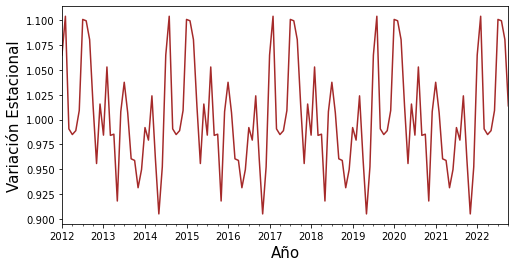

<Figure size 1152x1152 with 0 Axes>

In [63]:
seasonality_decomposition(dataset=data_multiplicative)

In [64]:
_solar_irradiation_day.to_csv('/Users/gloriacarrascal/TRABAJO-GRADO/data/irradiancia_prepared_data.csv')

In [81]:
#dato
_knn = _day.resample("M").mean().copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
_knn[['irradiancia']] = knn_imputer.fit_transform(_knn[['irradiancia']])
_knn[['irradiancia']].isnull().sum()
                                      

irradiancia    0
dtype: int64

### Escalar y normalizar la serie temporal

In [65]:
_month = _solar_irradiation_day.resample(rule="M").mean()

In [66]:
_month.describe()

,irradiancia
count,130.000000
mean,225.294025
std,19.298863
min,181.749619
25%,210.932297
50%,222.346227
75%,236.834742
max,287.701787


In [67]:
#"minmaxscaler"
#convert data into matrix of row-col vectors
_irradiation_month = _month.copy()
_irradiation_month = _irradiation_month.values.reshape((len(_irradiation_month), 1))
#feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
#fit the scaler with the train data to get min-max values
scaler = scaler.fit(_irradiation_month)
print("min and max: " ,scaler.data_min_, scaler.data_max_)
#normalize the data and sanity check
normalized_irradiation = scaler.transform(_irradiation_month)
normalized_list = [normalized_irradiation[i] for i in range(5)]
#inverse transform to obtain original values
#original_matrix = scaler.inverse_transform(normalized_irradiation

min and max:  [181.74961876] [287.70178736]


In [68]:
normalized_list

[array([0.4565861]),
 array([0.45632724]),
 array([0.38223089]),
 array([0.34288146]),
 array([0.31091114])]

### Looking proof of stationality
1. Gaussian distribution

<AxesSubplot:ylabel='Density'>

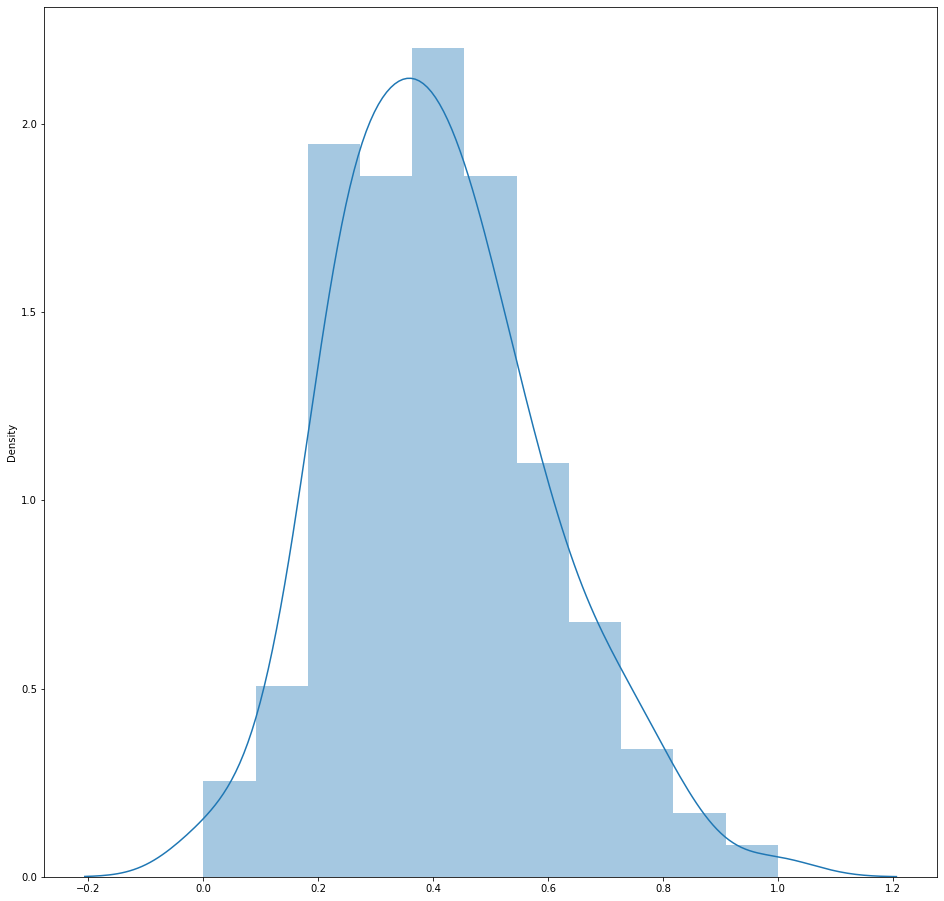

In [69]:
sns.distplot(normalized_irradiation)

La visualización parece tener una distribución gausiana, por tanto es buen indicio de estacionalidad


In [70]:
#math proof
x = normalized_irradiation
seq= round(len(x)/2)
x1, x2 = x[0:seq], x[seq:]
meanx1, meanx2 = x1.mean(), x2.mean()
varx1, varx2 = x1.var(), x2.var()
print('meanx1=%f, meanx2=%f' % (meanx1, meanx2))
print('varx1=%f, varx2=%f' % (meanx1, meanx2))

meanx1=0.388430, meanx2=0.433533
varx1=0.388430, varx2=0.433533


El promedio y la varianza no cambian entre ellos, por tanto es un indicio de que los datos son estacionarios

In [71]:
# test 1 - p-values
dftest = adfuller(_month['irradiancia'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.9052545445805236
2. P-Value :  0.04474036858236311
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


**Se confirma hipotesis nula** : Verdadera

- ¡La serie es estacionaria! **P-Value** == 0.04
- Los valores de arima: p, d, q = 1.

In [72]:
normalized_irradiation.shape


(130, 1)

In [73]:
train_size = int(130*0.75)

In [74]:
# dividiendo el dataset en prueba y test
train = normalized_irradiation[:train_size]
test =  normalized_irradiation[train_size:]

In [75]:
train_series = pd.DataFrame(train, index=_month[:train_size].index)
test_series = pd.DataFrame(test, index=_month[train_size:].index)


In [76]:
test_series

,0
FECHA/HORA,
2020-02-29,0.824963
2020-03-31,0.860337
2020-04-30,0.684201
2020-05-31,0.428058
2020-06-30,0.600800
2020-07-31,0.581741
2020-08-31,0.575421
2020-09-30,0.316173
2020-10-31,0.189185


- Arima no permite hacer predicción para datos estacionarios
- Se ajusta la estacionalidad usando: diferenciación de estacionalidad
- 

In [77]:
train.shape

(97, 1)

In [78]:
train

array([[0.4565861 ],
       [0.45632724],
       [0.38223089],
       [0.34288146],
       [0.31091114],
       [0.53611846],
       [0.51894577],
       [0.37323382],
       [0.37761743],
       [0.24674991],
       [0.34478386],
       [0.53130322],
       [0.74080356],
       [0.6872138 ],
       [0.52022551],
       [0.72428359],
       [0.48889213],
       [0.70138976],
       [0.69439796],
       [0.47326763],
       [0.28672078],
       [0.25177509],
       [0.21830736],
       [0.25879533],
       [0.33580945],
       [0.34888071],
       [0.46433926],
       [0.40166001],
       [0.25997392],
       [0.24299544],
       [0.39031232],
       [0.44673749],
       [0.23957453],
       [0.2155278 ],
       [0.22701883],
       [0.31800501],
       [0.58472963],
       [0.72071326],
       [0.65675836],
       [0.46749843],
       [0.40255279],
       [0.50371195],
       [0.35687621],
       [0.38408865],
       [0.27084136],
       [0.28834788],
       [0.12390883],
       [0.196

In [79]:
model=sm.tsa.arima.ARIMA(train ,order=(1,0,1), seasonal_order=(1,0,1,12))
history=model.fit()
#,seasonal_order=(1,0,1,12))

In [80]:
fc = history.forecast(12, alpha=0.05)
conf = history.get_forecast(12, alpha=0.05).conf_int()
se = history.bse

In [81]:
test_series.index[:12]

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='FECHA/HORA', freq='M')

In [82]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_series.index[:12])
lower_series = pd.Series(conf[:, 0], index=test_series.index[:12])
upper_series = pd.Series(conf[:, 1], index=test_series.index[:12])

In [83]:
lower_series

FECHA/HORA
2020-02-29    0.540146
2020-03-31    0.389172
2020-04-30    0.286535
2020-05-31    0.157964
2020-06-30    0.231701
2020-07-31    0.255552
2020-08-31    0.178363
2020-09-30    0.075044
2020-10-31   -0.008746
2020-11-30   -0.024362
2020-12-31    0.032400
2021-01-31    0.133515
Freq: M, dtype: float64

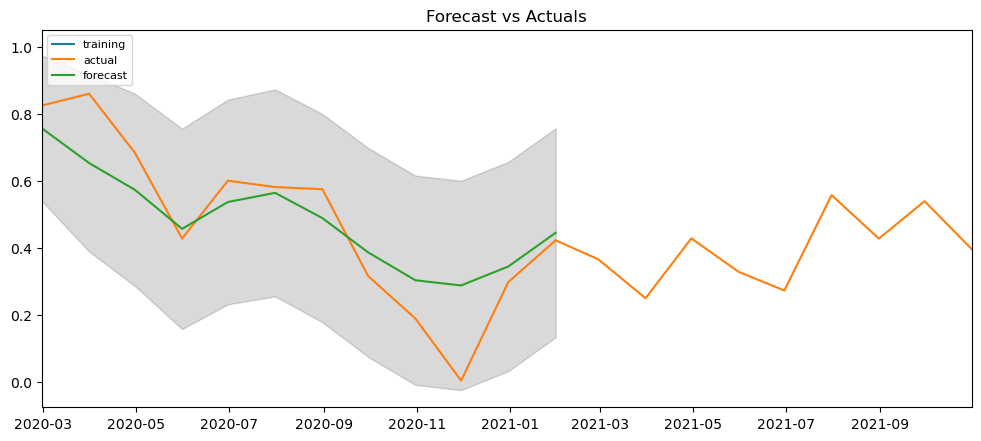

In [84]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_series, label='training')
plt.plot(test_series, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.xlim([test_series.index[0], test_series.index[20]])
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.savefig('/Users/gloriacarrascal/trabajo-grado/radiación global automáticas/graficas/caribe4.png')

plt.show()

In [85]:
_fc = fc_series.to_frame()

In [86]:
#plot with inversed normalization of the data
#converting the data
original_train = scaler.inverse_transform(train_series)
original_test = scaler.inverse_transform(test_series)
original_forecast = scaler.inverse_transform(_fc)

In [87]:

original_forecast

array([[261.9865752 ],
       [250.98409901],
       [242.52749634],
       [230.16644733],
       [238.65680273],
       [241.55259725],
       [233.57498828],
       [222.73530716],
       [213.91022461],
       [212.27300812],
       [218.27530103],
       [228.93555613]])

In [88]:
original_test

array([[269.15623047],
       [272.90417716],
       [254.24218454],
       [227.10326471],
       [245.40565872],
       [243.38637157],
       [242.71669439],
       [215.24885729],
       [201.7941591 ],
       [182.18111317],
       [213.35714206],
       [226.54857468],
       [220.52867323],
       [208.21587725],
       [227.16670631],
       [216.58581056],
       [210.67917732],
       [240.83837662],
       [227.0831809 ],
       [238.92305785],
       [223.70779747],
       [212.09831053],
       [207.11617423],
       [219.07383284],
       [233.14988084],
       [237.31264522],
       [247.31105905],
       [230.3106469 ],
       [246.45346373],
       [287.70178736],
       [220.96902576],
       [228.56790001],
       [211.82509257]])

In [89]:
original_train = pd.DataFrame(original_train, index=train_series.index)
original_test = pd.DataFrame(original_test, index=test_series.index)
original_forecast = pd.DataFrame(original_forecast, index=_fc.index)



In [90]:
_conf = scaler.inverse_transform(conf)

In [91]:
type(_conf)

numpy.ndarray

In [92]:
original_forecast.index

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='FECHA/HORA', freq='M')

In [93]:
original_forecast_series = original_forecast.squeeze()
#original_forecast_series

In [94]:
# Make as pandas series for forecast
fc_series = pd.Series(original_forecast_series, index=original_test.index)
lower_series = pd.Series(_conf[:, 0], index=original_test[:12].index)
upper_series = pd.Series(_conf[:, 1], index=original_test[:12].index)

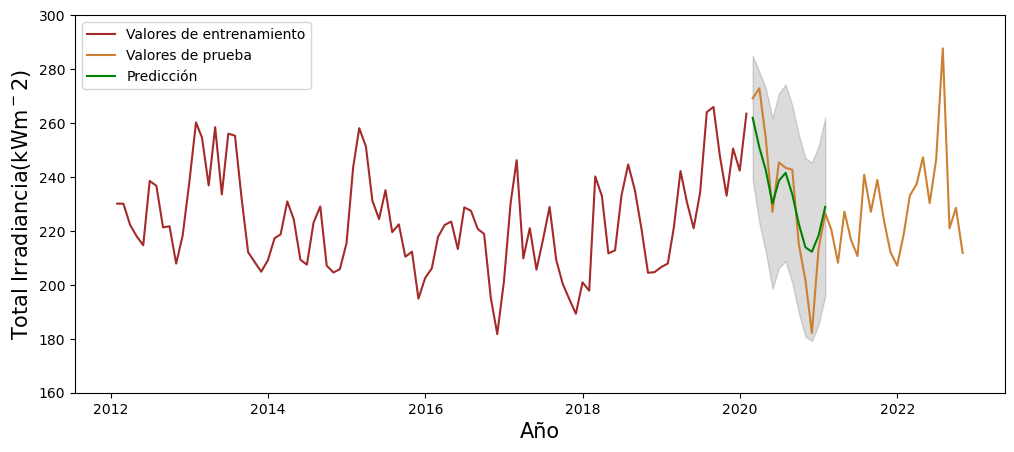

In [98]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(original_train, label='Valores de entrenamiento', color='brown')
plt.plot(original_test, label='Valores de prueba', color='#CD7F32')
plt.plot(fc_series, label='Predicción', color='green')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.14)
plt.ylim((160, 300))
#plt.title('Forecast vs test values')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Año',fontsize=15 )
plt.ylabel('Total Irradiancia(kWm$^-2$)', fontsize=15)
plt.savefig('/Users/gloriacarrascal/trabajo-grado/graficas/forecast_arima.png')

plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    #difference between predicted and actual values
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    #average of all absolute errors
    mae = mean_absolute_error(actual, forecast)
    #accuracy of the method
    mape = (mae/12)*100
    r2 = r2_score(actual, forecast)
    return({'rmse':rmse, 'mae':mae, 'mape': mape, 'r2':r2})

forecast_accuracy(original_forecast[:12], original_test[:12])

{'rmse': 12.745082228731244,
 'mae': 9.882624287108078,
 'mape': 82.35520239256732,
 'r2': 0.7575692116236978}

In [ ]:
mse = mean_squared_error(fc,  test.values[:12])
mse